In [21]:
#import libraries
import numpy as np
import sys
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd


In [22]:
FigureWidth = 3.375
factor = 1.5
# Set global parameters
params = {
          'lines.linewidth': 3,
          'axes.labelsize': int(13*factor),
          'legend.fontsize': int(10*factor),
          'xtick.labelsize': int(10*factor),
          'ytick.labelsize': int(10*factor),
          'text.usetex': True,
          'font.family': 'serif'}
plt.rcParams.update(params)
plt.rcParams['text.latex.preamble'] = r"\usepackage{amsmath}"

In [23]:
filename = "track_tip.dat"
df1 = pd.read_csv(filename, delimiter=' ', index_col = False)
Oh = 20
k = 20

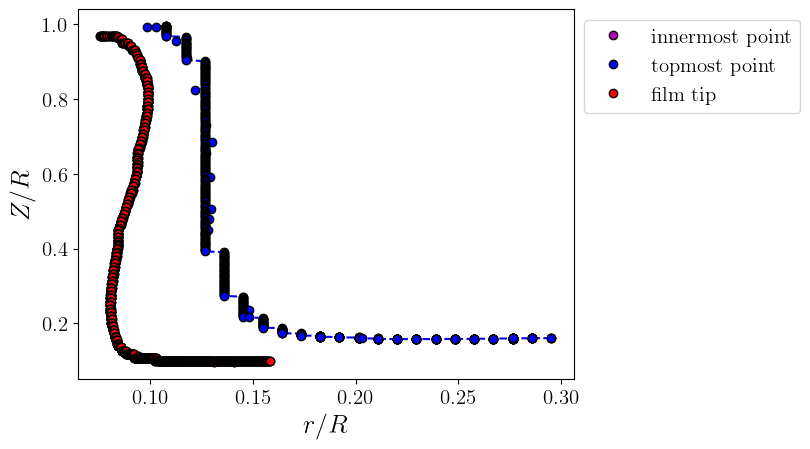

In [24]:
#Plot the film tip -locus
plt.plot(df1["y2"], df1["x2"], 'm--', linewidth = "1.5")
plt.plot(df1["y2"], df1["x2"], 'mo', mec = 'black',  markersize=6, markeredgewidth = 1, label="innermost point")
plt.plot(df1["y1"], df1["x1"], 'b--', linewidth = "1.5")
plt.plot(df1["y1"], df1["x1"], 'bo',mec = 'black',  markersize=6, markeredgewidth = 1, label="topmost point")
plt.plot(df1["y_tip"], df1["x_tip"], 'r--', linewidth = "1.5")
plt.plot(df1["y_tip"], df1["x_tip"], 'ro', mec = 'black',  markersize=6, markeredgewidth = 1, label="film tip")
plt.xlabel(r"$r/R$")
plt.ylabel(r'$Z/R$')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=True)
#plt.legend(loc = "best")
#plt.savefig('Zvsr_locus.png')
#plt.xlim(None, 1)
#plt.ylim(None, 1)
plt.savefig('Zvsr_locus.pdf', bbox_inches='tight')
plt.show()
#plt.clf()

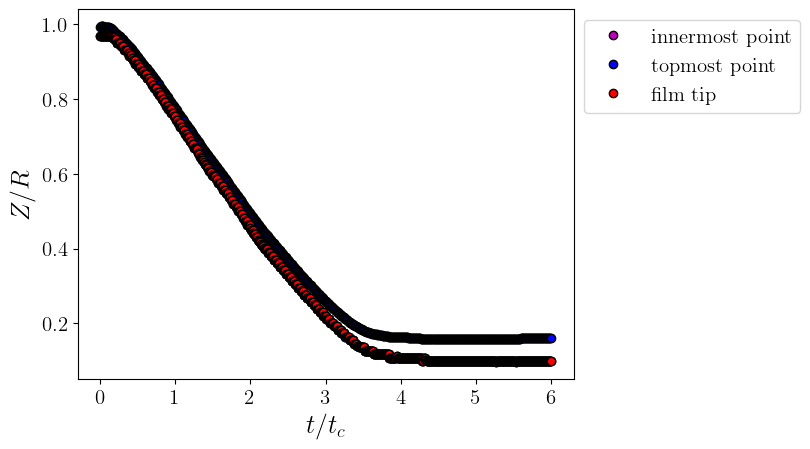

In [25]:
#Plot x_tip(height-z) vs t
plt.plot(df1["t"], df1["x2"], 'm--', linewidth = "1.5")
plt.plot(df1["t"], df1["x2"], 'mo', mec = 'black',  markersize=6, markeredgewidth = 1, label="innermost point")
plt.plot(df1["t"], df1["x1"], 'b--', linewidth = "1.5")
plt.plot(df1["t"], df1["x1"], 'bo',mec = 'black',  markersize=6, markeredgewidth = 1, label="topmost point")
plt.plot(df1["t"], df1["x_tip"], 'r--', linewidth = "1.5")
plt.plot(df1["t"], df1["x_tip"], 'ro',mec = 'black',  markersize=6, markeredgewidth = 1, label="film tip")
plt.xlabel(r"$t/t_c$")
plt.ylabel(r'$Z/R$')
#plt.savefig('zvst.png')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=True)
#plt.ylim(None, 1)
plt.savefig('Zvst.pdf', bbox_inches='tight')
plt.show()
#plt.clf()

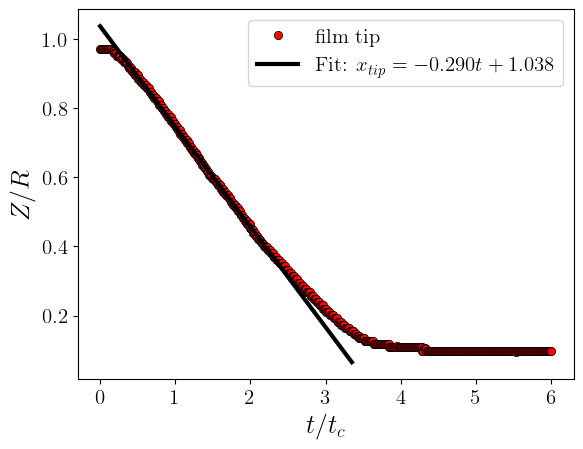

In [31]:
#Best fit straight line for Zvst
df_fit = df1[(df1['x_tip']>0.5) & (df1['x_tip']<0.95)]
# Fit a straight line: x_tip = m * t + c
coeffs = np.polyfit(df_fit['t'], df_fit['x_tip'], 1)
m, c = coeffs
# Generate fitted values
tmax = df_fit['t'].max()
t = np.arange(0, tmax+1.5, 0.01)
x_tip_fit = m * t + c
v_visc = np.abs(m)

# Plot the data and the fit
plt.plot(df1['t'], df1['x_tip'], 'ro', mec = 'black', markersize=6, markeredgewidth = 0.5, label="film tip")
plt.plot(t, x_tip_fit, 'k-', label=f'Fit: $x_{{tip}} = {m:.3f} t + {c:.3f}$')
plt.xlabel(r"$t/t_c$")
plt.ylabel(r"$Z/R$")

plt.savefig('Zvst_fit.pdf', bbox_inches='tight')
plt.legend()
plt.show()


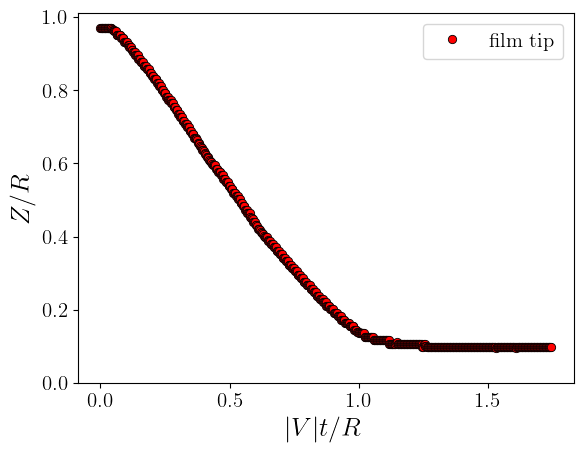

In [32]:
#ZVSt scaled with velocity
df1['t_scaled'] = df1['t']*np.abs(v_visc)

plt.plot(df1['t_scaled'], df1['x_tip'], 'ro', mec = 'black', markersize=6, markeredgewidth = 0.6, label="film tip")
plt.xlabel(r"$|V|t/R$")
plt.ylabel(r"$Z/R$")
#plt.xlim(None, 1)
plt.ylim(0, 1.01)
plt.savefig('Zvst_fit_scaled.pdf', bbox_inches='tight')
plt.legend()
plt.show()

In [33]:
#save df1, and write the velocity in a file
df1.to_csv("visc_tip.dat", sep=' ', index=False)

with open("vel.txt", "w") as f:
    f.write(f"average film tip downward velocity: {v_visc:.6f}\n")
with open("../Oh_k_viscvel.dat", "a") as f:
    f.write(f"{Oh} {k} {v_visc:.6f}\n")


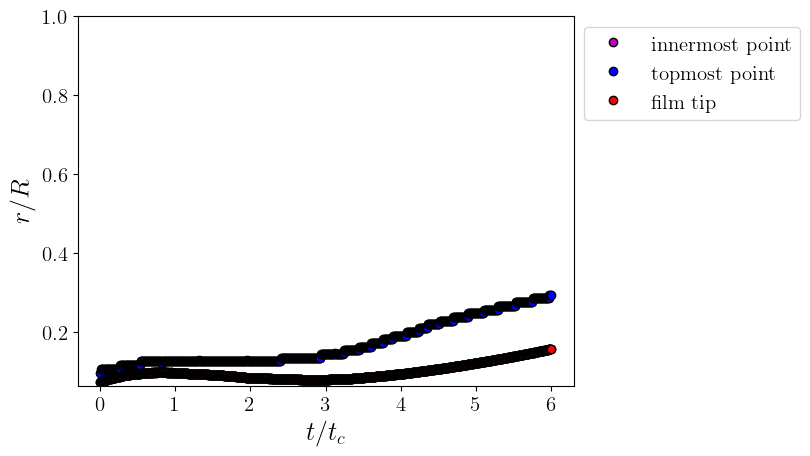

In [29]:
#Plot r_tip(spread) vs t
plt.plot(df1["t"], df1["y2"], 'm--', linewidth = "1.5")
plt.plot(df1["t"], df1["y2"], 'mo', mec = 'black',  markersize=6, markeredgewidth = 1, label="innermost point")
plt.plot(df1["t"], df1["y1"], 'b--', linewidth = "1.5")
plt.plot(df1["t"], df1["y1"], 'bo',mec = 'black',  markersize=6, markeredgewidth = 1, label="topmost point")
plt.plot(df1["t"], df1["y_tip"], 'r--', linewidth = "1.5")
plt.plot(df1["t"], df1["y_tip"], 'ro', mec = 'black',  markersize=6, markeredgewidth = 1,label="film tip")
plt.xlabel(r"$t/t_c$")
plt.ylabel(r'$r/R$')
#plt.savefig('rvst.png')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=True)
plt.ylim(None, 1)
plt.savefig('Rvst.pdf', bbox_inches='tight')
plt.show()
#plt.clf()

KeyError: 'delphi'